Section one verifies random number generation with IID Gaussians
    Gumbal Distribution
    root 2 ln(n)
    
Section two verifies the brownian bridge
    Gumbal Distribution
    Fixed S
    

# Standard Gaussians

In order to verify the validity of the data we have generated we will show that it coroborates with known theoretical results. This section shows that our random number generation is unbiased using two methods. The first will graph the random variable defined as the maxima of standard normal process minus the expected value of that process. The second will show 

In [2]:
import numpy as np
import pandas as pd

# For plotting data
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data

In [3]:
File = r"/Users/connormarrs/Math/FGF-manifold-simulator/Data/MaxDist/10000_20000_standard_normal_maxima.csv"

colnames=['max', 'exp'] 
data = pd.read_csv(File, names=colnames)

MaxData = np.array(list(data['max']))
# M = data['exp'][0]

In [4]:
TestFile = r"/Users/connormarrs/Math/FGF-manifold-simulator/Data/MaxDist/python_random_number_data_n10000_trials20000.csv"

colnames=['max', 'exp']
test_data = pd.read_csv(TestFile, names=colnames)

Test_NUMPY_MaxData = np.array(list(data['max']))

### Regression

In [5]:
# parameters for the pdf of limiting distribution of EM_n
n=10000

def a(n):
    return np.sqrt(2*np.log(n))

def b(n):
    return np.sqrt(2*np.log(n)) - 0.5*pow(2*np.log(n), -0.5)*(np.log(np.log(n))+np.log(4*np.pi))

def pdf(x):
    return np.exp(-x-np.exp(-x))

In [6]:
# PYTHON CONTROL DATA USING PCG64 - the modern one
from numpy.random import default_rng
rng = default_rng()

def computeMn_PCG64(nval):
    vals=rng.standard_normal(nval)
    return np.max(vals)

def sampleMn_PCG64(nval, numTrials):
    Mn_array = []
    for j in range(numTrials):
        Mn_array.append(computeMn_PCG64(nval))
    return np.array(Mn_array)

ControlMaxData_PCG64 = sampleMn_PCG64(n,20000)  

In [22]:
# PYTHON CONTROL DATA USING MT19937 - the ancient one
def sampleMn_MT19937(nval, numTrials):
    Mn_array=[];
    vals = np.random.standard_normal(size=(numTrials, nval))
    for j in range(numTrials):
        Mn_array.append(np.max(vals[j]))
    return np.array(Mn_array)
    
ControlMaxData_MT19937 = sampleMn_MT19937(n,20000)

In [40]:
# PYTHON CONTROL DATA USING NAIVE MT19937
def sampleMn_MT19937_naive(nval, numTrials):
    sample_array=np.zeros((numTrials, nval))
    for index in range(nval):
        # for each index, seed new random number generator and fill up
        # array of trials using np.random.standard_normal()
        np.random.seed(index)
        for trial in range(numTrials):
            sample_array[trial][index]=np.random.standard_normal()
    
    # compute the maximum
    max_array=np.zeros(numTrials)
    for trial in range(numTrials):
        max_array[trial]=np.max(sample_array[trial])
        
    return max_array

ControlMaxData_MT19937_Naive = sampleMn_MT19937_naive(n, 20000)
print(ControlMaxData_MT19937_Naive)

[3.75696167 4.05184744 4.51574031 ... 4.27784241 4.04970754 4.18137649]


### Convergence in Distribution

In [14]:
X = np.arange(-5, 10,.01)

# shift data and scale accordingly by a(n) and b(n)
MaxDataScaled = a(n)*(MaxData-b(n))
Test_NUMPY_MaxDataScaled = a(n)*(Test_NUMPY_MaxData-b(n))
ControlMaxData_PCG64Scaled = a(n)*(ControlMaxData_PCG64-b(n))
# ControlMaxData_MT19937Scaled = a(n)*(ControlMaxData_MT19937-b(n))
# ControlMaxData_MT19937_Naive_Scaled = a(n)*(ControlMaxData_MT19937_Naive-b(n))

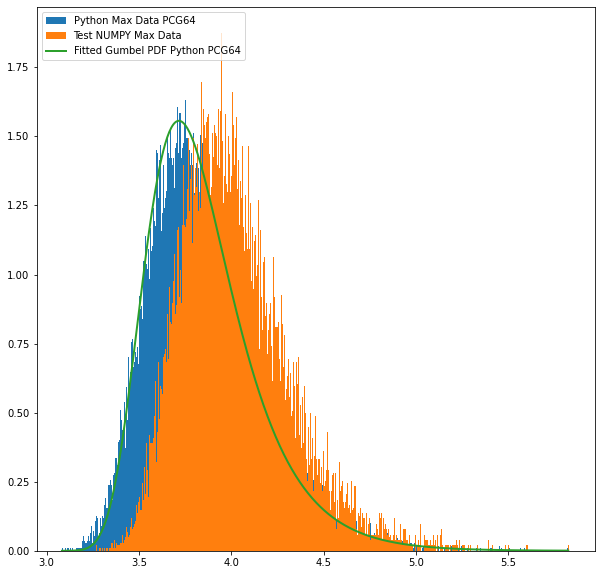

NameError: name 'mu1' is not defined

In [10]:
fig = plt.figure(figsize =(10,10))
ax1 = plt.subplot(111)

# ax1.plot(X, pdf(X), label="PDF of Gumbel Distribution")

(counts1, bins1) = np.histogram(MaxData, bins=500)
(counts2, bins2) = np.histogram(ControlMaxData_PCG64, bins=500)
# (counts3, bins3) = np.histogram(ControlMaxData_MT19937, bins=500)
(counts4, bins4) = np.histogram(Test_NUMPY_MaxData, bins=500)
plt.hist(bins2[:-1], bins2, weights=counts2, density=True, label="Python Max Data PCG64")
# plt.hist(bins3[:-1], bins3, weights=counts3, density=True, label="Python Max Data MT19937")
# plt.hist(bins1[:-1], bins1, weights=counts1, density=True, label="C++ Max Data")
plt.hist(bins4[:-1], bins4, weights=counts4, density=True, label="Test NUMPY Max Data")

# (counts5, bins5) = np.histogram(ControlMaxData_MT19937_Naive, bins=500)
# plt.hist(bins5[:-1], bins5, weights=counts5, density=True, label="Python Max Data MT19937 Naive")


# beta1 = np.std(MaxData) * np.sqrt(6) / np.pi
# mu1 = np.mean(MaxData) - 0.57721*beta1
# plt.plot(bins1, (1/beta1)*np.exp(-(bins1 - mu1)/beta1)
#          * np.exp(-np.exp(-(bins1 - mu1)/beta1)),
#          linewidth=2, label="Fitted Gumbel PDF C++")

beta2 = np.std(ControlMaxData_PCG64) * np.sqrt(6) / np.pi
mu2 = np.mean(ControlMaxData_PCG64) - 0.57721*beta2
plt.plot(bins2, (1/beta2)*np.exp(-(bins2 - mu2)/beta2)
         * np.exp(-np.exp(-(bins2 - mu2)/beta2)),
         linewidth=2, label="Fitted Gumbel PDF Python PCG64")

# beta3 = np.std(ControlMaxData_MT19937) * np.sqrt(6) / np.pi
# mu3 = np.mean(ControlMaxData_MT19937) - 0.57721*beta3
# plt.plot(bins3, (1/beta3)*np.exp(-(bins3 - mu3)/beta3)
#          * np.exp(-np.exp(-(bins3 - mu3)/beta3)),
#          linewidth=2, label="Fitted Gumbel PDF Python MT19937")

plt.legend(loc="upper left")
plt.show()

print([mu1, beta1, mu2, beta2])

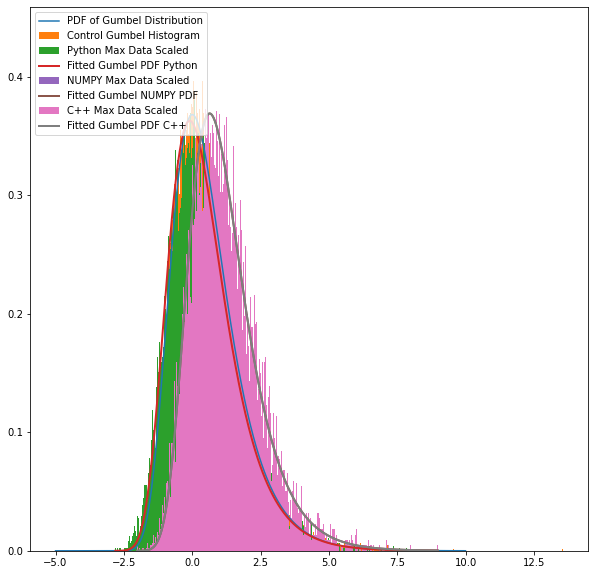

In [20]:
fig = plt.figure(figsize =(10,10))
ax1 = plt.subplot(111)

# Plot the Limit PDF of Gumbel and Histogram of Sample
ax1.plot(X, pdf(X), label="PDF of Gumbel Distribution")
control_gumbel = np.random.gumbel(0, 1, 20000)
count, bins = np.histogram(control_gumbel, 500)
plt.hist(bins[:-1], bins, weights=count, density=True, label="Control Gumbel Histogram")

# Plot the Histogram and Fitted PDF of the Python Generated Data with PCG64
(counts2, bins2) = np.histogram(ControlMaxData_PCG64Scaled, bins=500)
plt.hist(bins2[:-1], bins2, weights=counts2, density=True, label="Python Max Data Scaled")
beta2 = np.std(ControlMaxData_PCG64Scaled) * np.sqrt(6) / np.pi
mu2 = np.mean(ControlMaxData_PCG64Scaled) - 0.57721*beta2
plt.plot(bins2, (1/beta2)*np.exp(-(bins2 - mu2)/beta2)
         * np.exp(-np.exp(-(bins2 - mu2)/beta2)),
         linewidth=2, label="Fitted Gumbel PDF Python")

# Plot the Histogram and Fitted PDF of the C++ Generated Data
(counts3, bins3) = np.histogram(Test_NUMPY_MaxDataScaled, bins=500)
plt.hist(bins3[:-1], bins3, weights=counts3, density=True, label="NUMPY Max Data Scaled")
beta3 = np.std(Test_NUMPY_MaxDataScaled) * np.sqrt(6) / np.pi
mu3 = np.mean(Test_NUMPY_MaxDataScaled) - 0.57721*beta3
plt.plot(bins3, (1/beta3)*np.exp(-(bins3 - mu3)/beta3)
         * np.exp(-np.exp(-(bins3 - mu3)/beta3)),
         linewidth=2, label="Fitted Gumbel NUMPY PDF")

# Plot the Histogram and Fitted PDF of the C++ Generated Data
(counts1, bins1) = np.histogram(MaxDataScaled, bins=500)
plt.hist(bins1[:-1], bins1, weights=counts1, density=True, label="C++ Max Data Scaled")
beta1 = np.std(MaxDataScaled) * np.sqrt(6) / np.pi
mu1 = np.mean(MaxDataScaled) - 0.57721*beta1
plt.plot(bins1, (1/beta1)*np.exp(-(bins1 - mu1)/beta1)
         * np.exp(-np.exp(-(bins1 - mu1)/beta1)),
         linewidth=2, label="Fitted Gumbel PDF C++")

plt.legend(loc="upper left")
plt.show()

### Expected Value as n Increases
We know from Leadbetter et. al. that if $(X_n)_{n\in\mathbb{N}}$ is a sequence of $\mathcal{N}(0,1)$
i.i.d variables and $M_n=\max_{0\leq j\leq n}X_j$, then
$$
\mathbb{E}M_n \approx \sqrt(2\log(n)-\frac{1}{2}(2\log(n))^{-\frac{1}{2}}(\log\log(n)+\log(4\pi))
$$
Using this, we can plot and compare the empirical value of $\mathbb{E}M_n$ against the known
theoretical value. As it turns out, the empirical data that we generated agrees with the theory.

In [13]:
File = r'/Users/connormarrs/Math/FGF-manifold-simulator/Data/MaxDist/gaussian_expected_maxima50000.csv'

colnames=['n', 'exp'] 
data = pd.read_csv(File, names=colnames)

EXP = np.array(data['exp'])
N = np.array(data['n'])

In [14]:
# Computing the Python EMn data
def sample_EMn(numTrials):
    EMn_array = []
    for n in N:
        EMn_array.append(
            np.mean(sampleMn_PCG64(n, numTrials))
        )
    return EMn_array

Control_Exp_Data_PCG64 = sample_EMn(2000)  

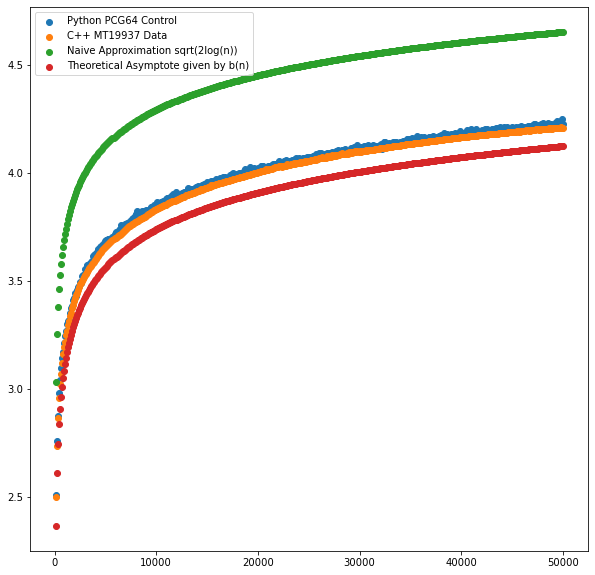

In [15]:
fig = plt.figure(figsize =(10,10))
plt.scatter(N,Control_Exp_Data_PCG64, label="Python PCG64 Control")
plt.scatter(N, EXP, label="C++ MT19937 Data")
plt.scatter(N, np.sqrt(2*np.log(N)), label="Naive Approximation sqrt(2log(n))")
plt.scatter(N, b(N), label="Theoretical Asymptote given by b(n)")
plt.legend(loc="upper left")
plt.show()

# Brownian Bridge

In [19]:
File = r'/Users/connormarrs/Math/gaussian-free-fields-reu/data/MaxDist/2500_0.500000.csv'

In [20]:
colnames=['max', 'exp'] 
data = pd.read_csv(File, names=colnames)

MaxData = list(data['max'])
M = data['exp'][0]

In [21]:
Diff = []

for x in range(len(MaxData)):
    Diff.append(MaxData[x] - M)

In [ ]:
fig = plt.figure(figsize =(10,10))
ax1 = plt.subplot(111)

ax1.hist(x=MaxData, bins=int(np.floor(len(MaxData)*.05)))
ax1.plot(P, BPDF(P))
plt.show()

In [ ]:
def BPDF(x):
    return (4*x/np.pi)*np.exp((-2*x**2)/(np.pi))

In [ ]:
P = [x for x in range(0,3)]

P = np.array(P)

In [33]:
address = '/Users/connormarrs/Math/gaussian-free-fields-reu/data/Maxima'

In [34]:
# min N, Max N, step-size
N_Data = ['500','1950','10']

# min S, max S, step-size
S_Data = ['0.0','0.5','.001']

# creates a variable for the .format() function which call specified files in \Maxima
Folder = address + '/{}_s0.0-0.5.csv'

In [35]:
# For some reason trying to create mlist in the function above breaks things
nlist = []
slist = []
mlist = []

for n in range(int(N_Data[0]), int(N_Data[1])+int(N_Data[2]), int(N_Data[2])):
    filenew = Folder.format(n)
    
    colnames=['n', 's','m'] 
    numbers = pd.read_csv(filenew, names=colnames)
    
    nlist.append(list(numbers['n']))
    slist.append(list(numbers['s']))
    mlist.append(list(numbers['m']))

In [36]:
S = .5

In [37]:
# The index function tells us the index of our S value so we can ensure a proper zip with the future m values
Index = slist[0].index(S)

In [38]:
nFixed = []
mFixed = []

for s in range(len(slist)):
    if S in slist[s]:
        nFixed.append(nlist[s][Index])
        mFixed.append(mlist[s][Index])
        
nFixed = np.array(nFixed)
mFixed = np.array(mFixed)

In [39]:
def asymptotic(x):
    return np.sqrt(np.pi/2)*np.pi/(2*np.sqrt(2))

asymptotic_array = []

for x in range(len(nFixed)):
    asymptotic_array.append(asymptotic(x))

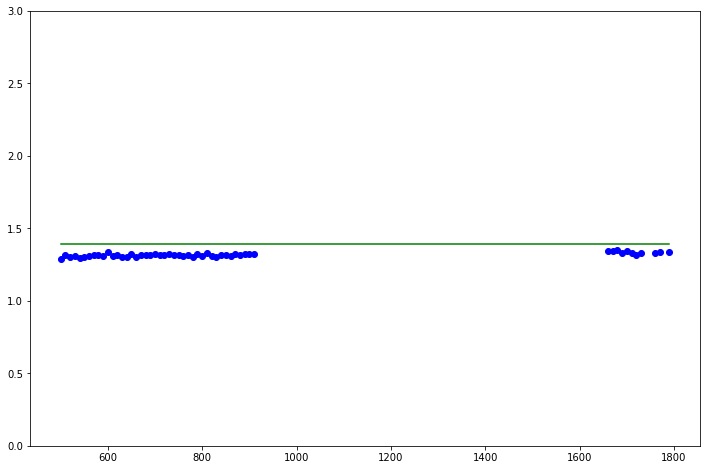

In [40]:
%matplotlib inline
f = plt.figure(figsize = (12,8))
ax1 = plt.subplot(111)
ax1.set_ylim(0,int(np.ceil(max(mFixed)))+1)

ax1.scatter(nFixed, mFixed, c='blue')
ax1.plot(nFixed, asymptotic_array, c='green')
